# Data Exploration

In the data collection notebook, I gathered only a small sample of games from chess.com. As this process is time-consuming for execution in a Jupyter Notebook, I have uploaded a larger and more robust dataset on Kaggle, similar to the previous one. You can download it [here](https://www.kaggle.com/datasets/leandrocouto/chess-games-from-chess-com/data) and find more information about the dataset's columns there.

Let's import the dataset:

In [1]:
import statistics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from kmodes.kprototypes import KPrototypes

#seed for reproducibility
np.random.seed(123)

In [2]:
chess_data = pd.read_csv('chess_data.csv', header=0, sep=';')
chess_data

,white,white_elo,white_country,black,black_elo,black_country,result,uuid,fen,URL,ECO,ECO_URL,UTC_date,end_date,start_time,end_time,time_control,tcn,moves
0,01RandomGuy,238,US,Dragonova1,562,PH,0-1,e9ca5d0c-5c04-11eb-b524-0069e4010001,r3kbnr/1p6/2n2p2/p1p4p/P2P1p1P/1PP5/8/RKBb1Bq1...,https://www.chess.com/game/live/6302963188,A00,https://www.chess.com/openings/Grob-Opening-1....,2021.01.21,2021.01.21,16:22:59,16:26:43,600,oE0Kiq1TbsZJsJ6EJT2TqyYIjrWGnDKDpF3NmC5QlB70ks...,1. g4 { [%clk 0:09:55.7] } 1... e5 { [%clk 0:0...
1,Jordan6849,299,SG,01RandomGuy,100,US,1-0,e410048a-0d81-11ec-9abe-09ff3c010001,1nbq1b1r/rpppkppp/8/4p3/2P5/8/PP1PPKBP/R1BQ2NR...,https://www.chess.com/game/live/24499959847,A22,https://www.chess.com/openings/English-Opening...,2021.09.04,2021.09.04,13:13:31,13:15:57,600,kA0Kbs!TsH80HW4WoETEfoEnen,1. c4 { [%clk 0:10:00] } 1... e5 { [%clk 0:09:...
2,bigcockandalsoballz,100,US,01RandomGuy,246,US,0-1,ca504944-1640-11ec-b546-09ff3c010001,1nbqkbnr/1p1ppppp/8/2p5/r1P2P2/8/PPNPP1PP/R1B1...,https://www.chess.com/game/live/25461711631,A02,https://www.chess.com/openings/Birds-Opening,2021.09.15,2021.09.15,16:20:16,16:21:45,600,nDYIkA7GbqG7dyWGyG4GqkGy,1. f4 { [%clk 0:10:00] } 1... c5 { [%clk 0:10:...
3,01RandomGuy,125,US,bigcockandalsoballz,295,US,0-1,3de321e1-8905-11ec-8587-78ac4409ff3c,5r2/pp4p1/b3k3/7p/8/4p3/PP5n/K1r5 w - -,https://www.chess.com/game/live/38080759341,C42,https://www.chess.com/openings/Petrovs-Defense...,2022.02.08,2022.02.08,17:33:46,17:43:12,600,mC0Kgv!TfA9Ilt5OA181vK1!KU79U9!9oEIzef98CK?9KS...,1. e4 { [%clk 0:10:00] } 1... e5 { [%clk 0:10:...
4,bigcockandalsoballz,134,US,01RandomGuy,240,US,0-1,a55e1bea-8906-11ec-8587-78ac4409ff3c,r1b1Bknr/ppp1p2p/6pb/3q4/8/7N/PPP2PPP/RN3RK1 b...,https://www.chess.com/game/live/38081360503,D00,https://www.chess.com/openings/Queens-Pawn-Ope...,2022.02.08,2022.02.08,17:43:51,17:50:04,600,lBZJmu1LfH81uCLCHm2Ugx5QegQBdB18mH81cV9VBC19CJ...,1. d4 { [%clk 0:10:00] } 1... d5 { [%clk 0:10:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981613,MSDub,1852,US,Betaband7471,1859,AR,0-1,caf9a83a-7eb9-11ea-83de-eb3d40010001,8/8/8/3ppk1p/2p2p2/2P2P1P/1b2K3/5N2 w - -,https://www.chess.com/game/live/4723717989,C02,https://www.chess.com/openings/French-Defense-...,2020.04.15,2020.04.15,01:38:50,01:49:09,300,mC0SlBZJCKYIks5Qgv6Zfm!0BI0Ueg9IvBUKcuI0bl8!lv...,1. e4 { [%clk 0:04:59.5] } 1... e6 { [%clk 0:0...
981614,ernestopradines,1626,AR,Betaband7471,1862,AR,0-1,301e8387-8026-11ea-a275-eb3d40010001,8/R4p2/7k/3p2qp/2pP3K/3pP1PP/R3nP2/8 w - -,https://www.chess.com/game/live/4731677800,A04,https://www.chess.com/openings/Reti-Opening-Ni...,2020.04.16,2020.04.16,21:07:01,21:16:13,180+2,gv!TjrZRcj0KlBKCvlRJkAYQmu9Rbs6Low5Zfo8!eg98iq...,1. Nf3 { [%clk 0:03:01.9] } 1... Nf6 { [%clk 0...
981615,Betaband7471,1867,AR,montecaseros,1706,AR,1-0,86382dff-8027-11ea-a275-eb3d40010001,8/p7/3p3p/2pP1Pk1/8/4N1P1/P4P2/6K1 b - -,https://www.chess.com/game/live/4731712756,A56,https://www.chess.com/openings/Benoni-Defense-...,2020.04.16,2020.04.16,21:16:47,21:24:14,180+2,lBYIBJ!TkATCdk7GblCRgv2UmC92fm8!egXHCKRAlAHAkA...,1. d4 { [%clk 0:03:01.9] } 1... c5 { [%clk 0:0...
981616,Betaband7471,1861,AR,JavierMorasso,1953,AR,0-1,ff3ee35e-8028-11ea-a275-eb3d40010001,8/5p2/6p1/8/6k1/8/r3NK2/8 w - -,https://www.chess.com/game/live/4731750592,D30,https://www.chess.com/openings/Queens-Gambit-D...,2020.04.16,2020.04.16,21:27:13,21:37:09,180+2,lBZJkA0SAJSJbsYQdk2UmCJCkC70gv6LC090fA!TBJ8!cV...,1. d4 { [%clk 0:03:01.9] } 1... d5 { [%clk 0:0...


Because the API can return faulty responses or there may be no data to fetch from it, let's check if our dataset has any missing values:

In [3]:
chess_data.isnull().sum()

white               0
white_elo           0
white_country    1506
black               0
black_elo           0
black_country    1439
result              0
uuid                0
fen                 0
URL                 0
ECO              4851
ECO_URL          4851
UTC_date            0
end_date            0
start_time          0
end_time            0
time_control        0
tcn              4423
moves            4423
dtype: int64

Since the `moves` column is crucial to the purpose of this project (Guess The Elo), I will delete entries that lack this information. Although not as critical, I'll also remove entries without countries and opening information due to an analysis I plan to conduct later in this notebook.

In [4]:
chess_data.dropna(subset=['moves', 'white_country', 'black_country', 'ECO_URL'], inplace=True)

I will now delve into our data to gain a deeper understanding of the most commonly used chess openings and to identify any correlations among ratings, openings, and players' nationalities, if they exist.

Let's begin by examining the most played openings:

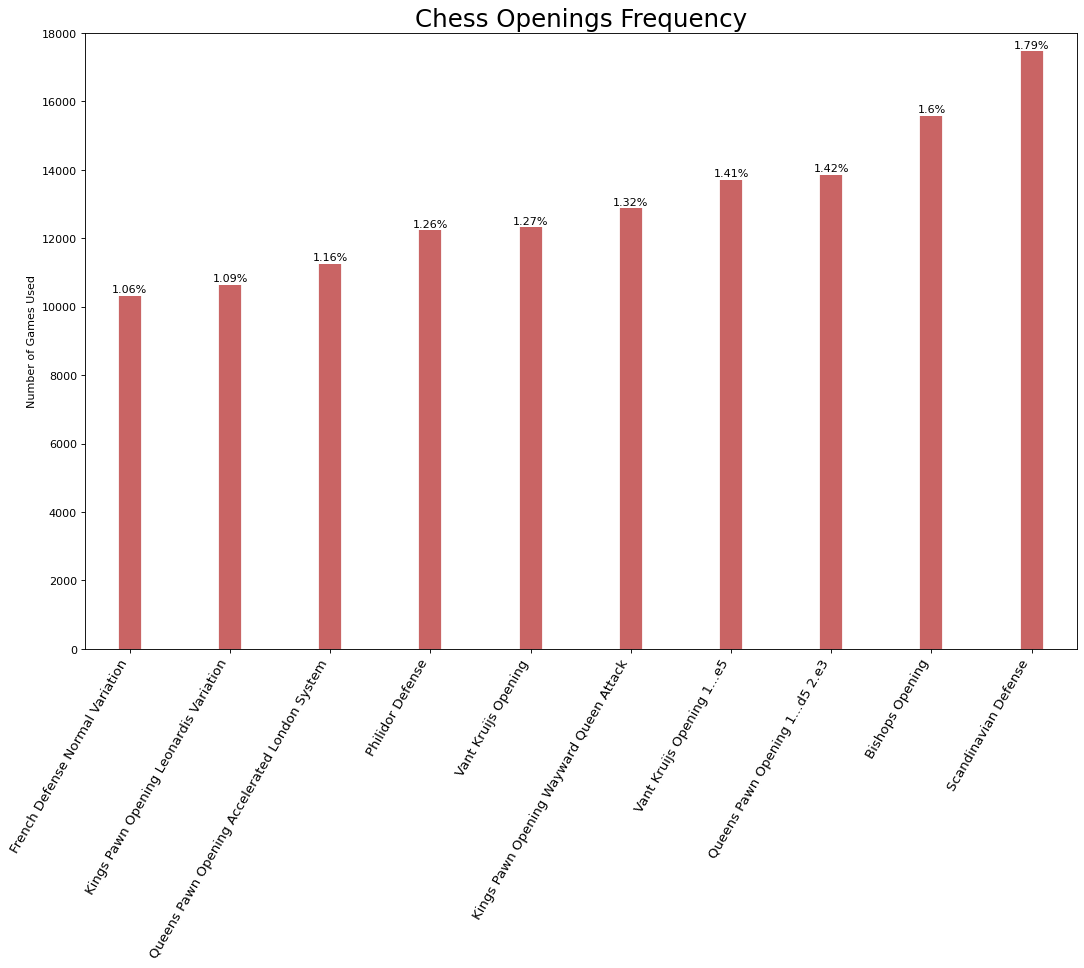

In [5]:
n_ticks = 10
opening_names = chess_data['ECO_URL'].value_counts()[:n_ticks].index
opening_names = [opening[opening.rfind('/')+1:].replace('-', ' ') for opening in opening_names]
opening_names.reverse()
opening_counts = chess_data['ECO_URL'].value_counts()[:n_ticks].values.tolist()
opening_counts.reverse()
opening_counts_percentage = [counts*100/len(chess_data.index) for counts in opening_counts]

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=range(n_ticks), ymin=0, ymax=opening_counts, color='firebrick', alpha=0.7, linewidth=20)

for i, percentage in enumerate(opening_counts_percentage):
    ax.text(i, opening_counts[i]+100, str(round(percentage, 2))+'%', horizontalalignment='center')

ax.set_title('Chess Openings Frequency', fontdict={'size':22})
ax.set(ylabel='Number of Games Used', ylim=(0, 18000))
plt.xticks(range(n_ticks), opening_names, rotation=60, horizontalalignment='right', fontsize=12)

plt.show()

These openings are all expected, most of them pushing C and D pawns for center control. There is one indicator that this dataset might have a big number of lower rated players: the Kings Pawn Opening Wayward Queen Attack, more known as Scholar's Mate. The Scholar's Mate is extremely used with players that are getting into chess, as it provides a chance of checkmating the opponent with only a few moves.

Let's now investigate the players' ratings in this dataset:

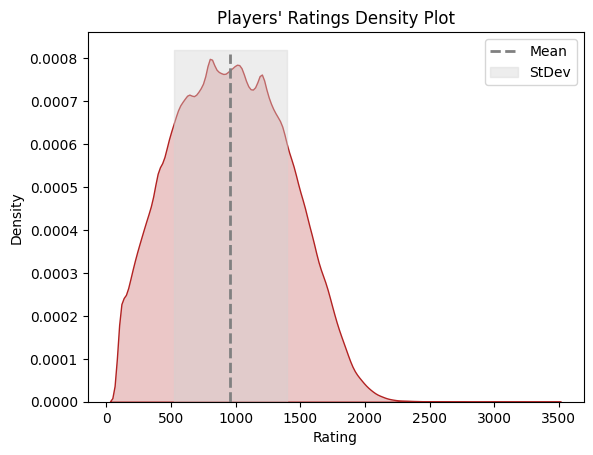

In [6]:
chess_ratings = chess_data['white_elo'].tolist() + chess_data['black_elo'].tolist()
mean_rating = statistics.mean(chess_ratings)
std_rating = statistics.pstdev(chess_ratings)

sns.kdeplot(chess_ratings, fill=True, color='firebrick')
mean_line = plt.axvline(mean_rating, 0, 0.94, color='gray', linestyle='--', linewidth=2, label='Mean')
stdev_fill = plt.fill_betweenx([0, 0.00082], mean_rating - std_rating, mean_rating + std_rating, color='lightgray', alpha=0.4, label='StDev')

plt.xlabel('Rating')
plt.ylabel('Density')
plt.title("Players' Ratings Density Plot")
plt.legend(handles=[mean_line, stdev_fill], loc='upper right')

plt.show()

As suspected in the Data Collection notebook and upon analyzing the openings, the vast majority of our dataset belongs to beginner to beginner-intermediate players. Although our distribution is unfortunately biased, it seems to exhibit a slight correlation with [chess.com's official average blitz rating](https://www.chess.com/leaderboard/live), which, at the time of writing, is 646.92.

Now, let's investigate if there are any correlations between players' ratings, their played openings, and their countries of origin. First, I'll work with a slice of the original dataframe, focusing only on the columns related to openings, Elo, and country. In chess, each game involves two players, and the opening used is relevant to both players individually (and, consequently, to their rating columns). Therefore, I'll replicate the opening used for each entry in the dataframe, taking into consideration their rating and country.

Finally, I will normalize the ratings column, as K-means, which will be discussed shortly, is sensitive to scale.

In [7]:
rating_opening_data = chess_data[['ECO_URL', 'white_elo', 'black_elo', 'white_country', 'black_country']]
white = rating_opening_data[['ECO_URL', 'white_elo', 'white_country']]
black = rating_opening_data[['ECO_URL', 'black_elo', 'black_country']]
white = white.rename(columns={'white_elo': 'elo', 'white_country': 'country'})
black = black.rename(columns={'black_elo': 'elo', 'black_country': 'country'})

rating_opening_data = pd.concat([white, black], axis=0)
rating_opening_data = rating_opening_data.reset_index(drop=True)

# min-max scaling
rating_opening_data['elo_normalized'] = (rating_opening_data['elo'] - rating_opening_data['elo'].min()) / (rating_opening_data['elo'].max() - rating_opening_data['elo'].min())     


rating_opening_data

,ECO_URL,elo,country,elo_normalized
0,https://www.chess.com/openings/Grob-Opening-1....,238,US,0.041256
1,https://www.chess.com/openings/English-Opening...,299,SG,0.059492
2,https://www.chess.com/openings/Birds-Opening,100,US,0.000000
3,https://www.chess.com/openings/Petrovs-Defense...,125,US,0.007474
4,https://www.chess.com/openings/Queens-Pawn-Ope...,134,US,0.010164
...,...,...,...,...
1947785,https://www.chess.com/openings/French-Defense-...,1859,AR,0.525859
1947786,https://www.chess.com/openings/Reti-Opening-Ni...,1862,AR,0.526756
1947787,https://www.chess.com/openings/Benoni-Defense-...,1706,AR,0.480120
1947788,https://www.chess.com/openings/Queens-Gambit-D...,1953,AR,0.553961


To examine the possible correlations previously discussed, one would generally use `K-means`, an unsupervised learning clustering algorithm, to partition the dataframe into clusters that maximize the 'likeness' of their respective data points, numerically speaking.

However, because the data have a mix of numerical and categorical features, I will use a variation of K-means called `K-prototype`. In the `kmodes` implementation, the default dissimilarity function for numerical features is the Euclidean distance, whereas for categorical data, it uses the matching (or Hamming) distance, which counts the number of dissimilar categorical features between two data points.

Let's run K-prototype with 5 clusters:

In [8]:
k_prototype_data = rating_opening_data.drop(['elo'], axis=1)
kproto = KPrototypes(n_clusters=5, init='Cao', verbose=1)
clusters = kproto.fit_predict(k_prototype_data.values, categorical=[0,1])
centroids = kproto.cluster_centroids_ 

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 422572, ncost: 207717.96388693104
Run: 1, iteration: 2/100, moves: 171136, ncost: 207548.94559294524
Run: 1, iteration: 3/100, moves: 68261, ncost: 207525.3394514582
Run: 1, iteration: 4/100, moves: 26658, ncost: 207521.69625789786
Run: 1, iteration: 5/100, moves: 10179, ncost: 207521.16887456246
Run: 1, iteration: 6/100, moves: 3651, ncost: 207521.0889696784
Run: 1, iteration: 7/100, moves: 605, ncost: 207521.08622247662
Run: 1, iteration: 8/100, moves: 9, ncost: 207521.08620455358
Run: 1, iteration: 9/100, moves: 0, ncost: 207521.08620455358
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 300458, ncost: 205744.60535424307
Run: 2, iteration: 2/100, moves: 79074, ncost: 205703.058009044
Run: 2, iteration: 3/100, moves: 28264, ncost: 205

Let's determine the number of data points assigned to each of the five clusters.

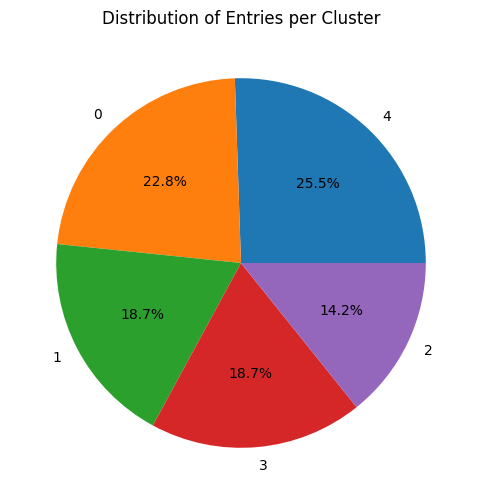

In [9]:
k_prototype_data['cluster'] = clusters
value_counts = k_prototype_data['cluster'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Entries per Cluster')
plt.show()

A relatively balanced distribution of data points per cluster suggests that the data is well separated. However, it's important to note that this is not a rule of thumb, so let's conduct a more in-depth analysis.

In [33]:
k_prototype_data

,ECO_URL,country,elo_normalized,cluster
0,https://www.chess.com/openings/Grob-Opening-1....,US,0.041256,0
1,https://www.chess.com/openings/English-Opening...,SG,0.059492,0
2,https://www.chess.com/openings/Birds-Opening,US,0.000000,0
3,https://www.chess.com/openings/Petrovs-Defense...,US,0.007474,0
4,https://www.chess.com/openings/Queens-Pawn-Ope...,US,0.010164,0
...,...,...,...,...
1947785,https://www.chess.com/openings/French-Defense-...,AR,0.525859,4
1947786,https://www.chess.com/openings/Reti-Opening-Ni...,AR,0.526756,4
1947787,https://www.chess.com/openings/Benoni-Defense-...,AR,0.480120,4
1947788,https://www.chess.com/openings/Queens-Gambit-D...,AR,0.553961,4


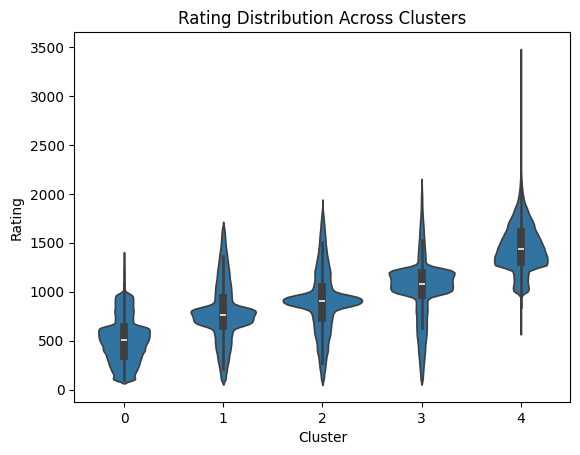

In [63]:
k_prototype_data['elo'] = rating_opening_data['elo']
sns.violinplot(x='cluster', y='elo', data=k_prototype_data)
plt.title('Rating Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.show()

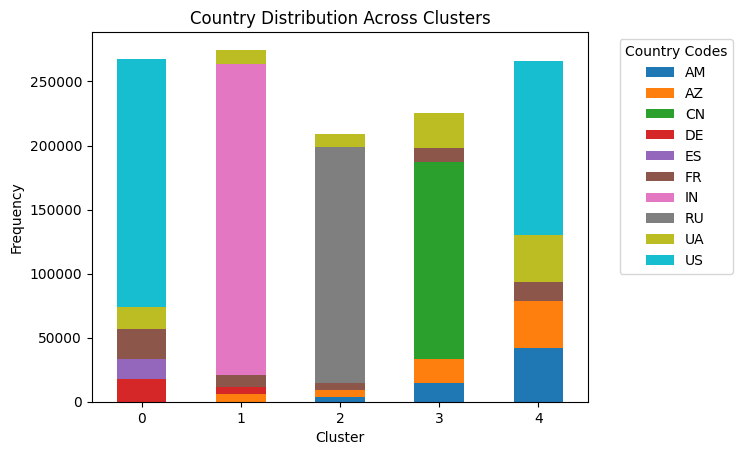

In [65]:
top_countries = k_prototype_data.groupby('cluster')['country'].value_counts().groupby('cluster').head(5)
top_countries_df = top_countries.reset_index(name='count')
pivot_top_countries_df = top_countries_df.pivot(index='cluster', columns='country', values='count')

pivot_top_countries_df.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Country Distribution Across Clusters')
plt.xticks(rotation=0)
plt.legend(title='Country Codes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


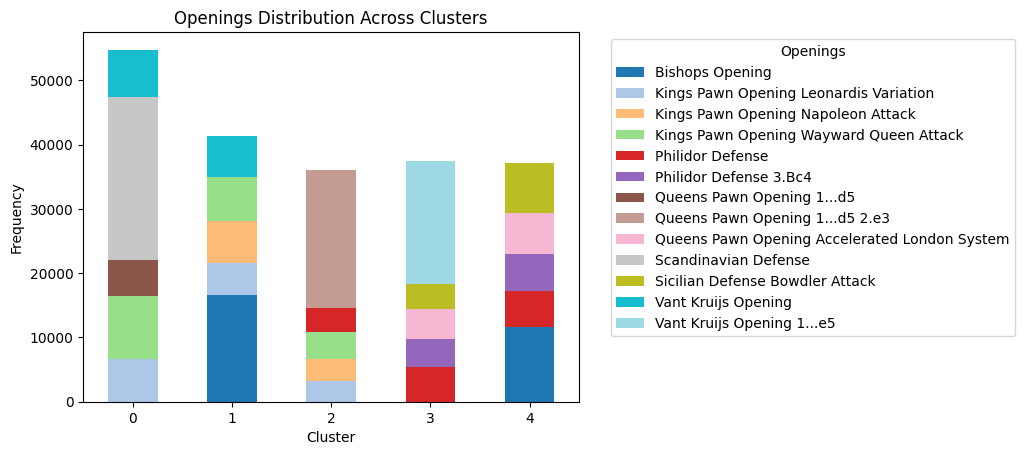

In [66]:
k_prototype_data['opening'] = k_prototype_data['ECO_URL'].apply(lambda x: x[x.rfind('/')+1:].replace('-', ' '))
top_openings = k_prototype_data.groupby('cluster')['opening'].value_counts().groupby('cluster').head(5)
top_openings_df = top_openings.reset_index(name='count')
pivot_top_openings_df = top_openings_df.pivot(index='cluster', columns='opening', values='count')

pivot_top_openings_df.plot(kind='bar', stacked=True, colormap=plt.colormaps['tab20'])
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Openings Distribution Across Clusters')
plt.xticks(rotation=0)
plt.legend(title='Openings', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Upon observation, cluster 0 predominantly consists of beginners (rated < 500). Interestingly, the majority of players in this cluster are from the US, followed by four European countries. It appears that complete beginners tend to favor the Scandinavian Defense, which is expected as it involves a natural pawn move to the center of the board. Surprisingly, the Wayward Queen Attack is only the second most played opening in this cluster. One possible explanation could be that, as these players are true beginners, they might not have had the chance to learn any tricks, such as the Scholar's Mate, and are just starting to grasp the game. Upon closer examination, the usage of the Scholar's Mate significantly decreases as we progress through the clusters (and the average rating increases), which is expected as players learn how to efficiently play against this opening.

Considering the country distribution, it's no surprise that the largest chess-playing nations dominate various clusters. The US is the majority in both low and high-rated clusters, while India, Russia, and China are prominent in between. It's important to note that, although the data collection step retrieved an equal number of players from the top 20 chess countries globally, the countries of those players' opponents weren't considered. Since our analysis incorporates information from both players, a high number of players from densely populated countries, particularly those passionate about chess, is expected, resulting in a bias in that regard.

Regarding the chess openings across clusters, it's noticeable that in higher-rated clusters (like cluster 4), there's a decrease in the dominance of a single opening. For instance, the Scandinavian Defense in Cluster 0 and Queen's Pawn Opening 1...d5 2.e3 for Cluster 2. This is expected; as chess players improve, they tend to explore a broader array of chess openings to better prepare for various opponent strategies. In Cluster 4, the five most-used openings display a diverse range of distinct choices, reinforcing the earlier point.